Data set dedicated to the cost of treatment of different patients.<br>The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on.<br>We have no data on the diagnosis of patients.

<b>Columns :</b>
+ <b>age:</b> age of primary beneficiary
+ <b>sex:</b> insurance contractor gender, female, male
+ <b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
+ <b>children:</b> Number of children covered by health insurance / Number of dependents
+ <b>smoker:</b> Smoking
+ <b>charges:</b> Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/home/suyash/Downloads/insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.drop(columns=['region'],inplace=True)

In [5]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [6]:
df.isnull().sum() # no missing value is present

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

### LabelEncoding

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.corr()['charges'].sort_values()

sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

## Correlation Heatmap

(6.0, 0.0)

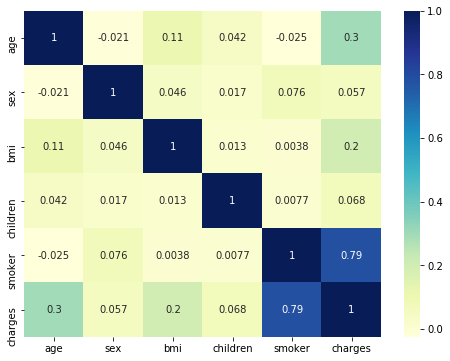

In [10]:
plt.figure(figsize=(8,6))
ax = sb.heatmap(df.corr(), annot=True,cmap='YlGnBu') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

As we can see that charges have linear positie correlation with smoker column.

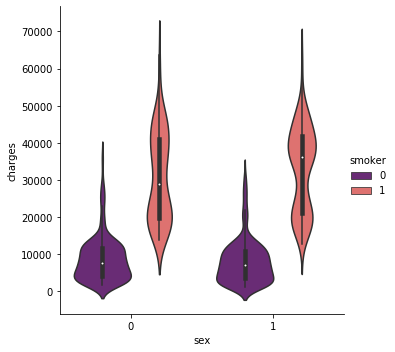

In [11]:
sb.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

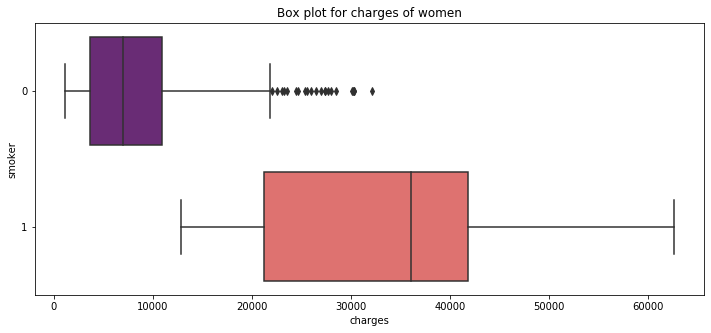

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sb.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

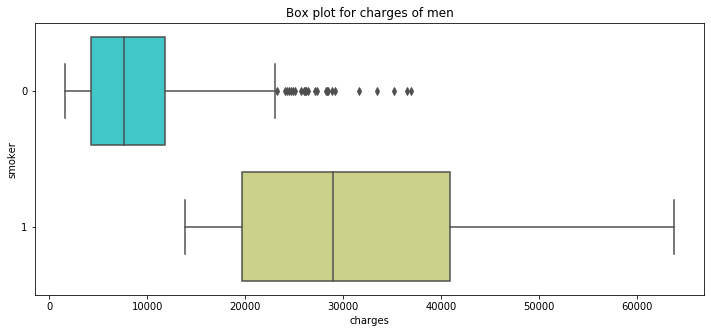

In [13]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sb.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

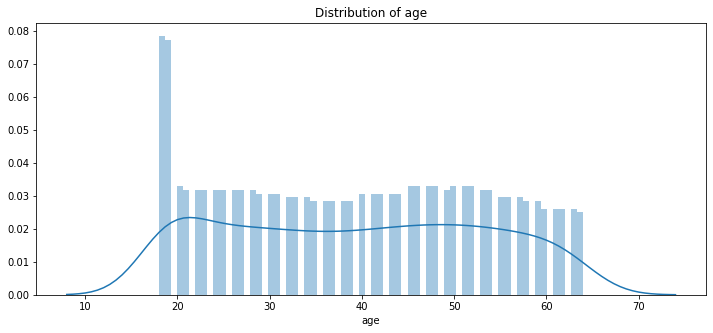

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sb.distplot(df["age"],bins=70)

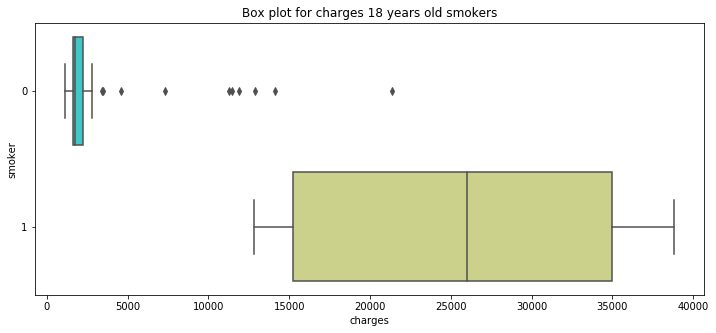

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sb.boxplot(y="smoker", x="charges", data =  df[(df.age == 18)] , orient="h", palette = 'rainbow')

The age of 18 smokers spend much more on treatment than non-smokers.

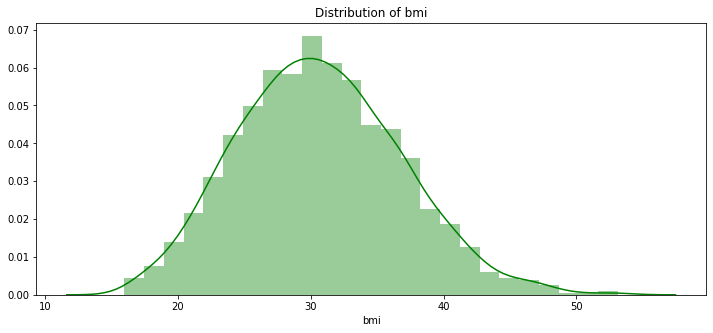

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sb.distplot(df["bmi"], color = 'g')

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

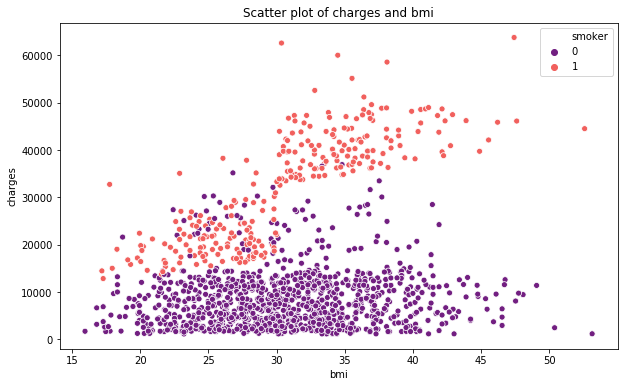

In [17]:
plt.figure(figsize=(10,6))
ax = sb.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

<Figure size 1080x432 with 0 Axes>

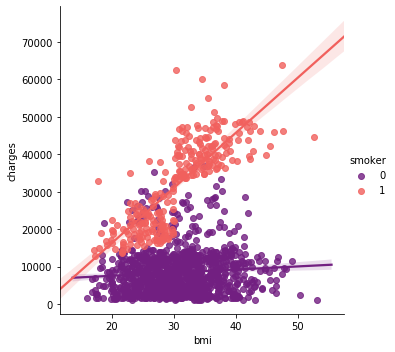

In [18]:
plt.figure(figsize=(15,6))
sb.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

We are going to use RMSE ( Root Mean Squared Error ) as our metrics

In [20]:
X = df.drop(columns=['charges'])
Y = df['charges']

## Linear Regression

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,shuffle=True) 

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
np.sqrt( mean_squared_error(ytest,lr.predict(xtest)) )

6320.045945818083

## Linear Regression with polynomial interaction

In [25]:
quad = PolynomialFeatures (degree = 2,
                           interaction_only=True,
                           )
x_quad = quad.fit_transform(X)

xtrain,xtest,ytrain,ytest = train_test_split(x_quad,Y)

In [26]:
plr = LinearRegression().fit(xtrain,ytrain)

In [27]:
np.sqrt( mean_squared_error(ytest,plr.predict(xtest)) )

5439.778175461302

## Random Forest Regressor

In [28]:
rf = RandomForestRegressor(max_depth=8,
                           n_estimators=100)

In [29]:
rf.fit(xtest,ytest)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [30]:
np.sqrt( mean_squared_error(ytest,rf.predict(xtest)) )

2830.4586646471053

# THANK YOU